## Data loading

### Subtask:
Load the "device.csv" and "insiders.csv" files into separate pandas DataFrames.


In [ ]:
import pandas as pd

df_device = pd.read_csv("device.csv")
df_insiders = pd.read_csv("insiders.csv")

## Data exploration

### Subtask:
Explore the loaded dataframes `df_device` and `df_insiders` to understand their structure and potential issues.


In [ ]:
# Examine Data Shape and Columns
print("df_device shape:", df_device.shape)
print("df_device columns:", df_device.columns.tolist())
print("df_insiders shape:", df_insiders.shape)
print("df_insiders columns:", df_insiders.columns.tolist())

# Check Data Types
print("\ndf_device data types:\n", df_device.dtypes)
print("\ndf_insiders data types:\n", df_insiders.dtypes)

# Identify Missing Values
print("\ndf_device missing values:\n", df_device.isnull().sum())
print("\ndf_insiders missing values:\n", df_insiders.isnull().sum())

# Explore Unique Values
print("\ndf_device unique users:", df_device['user'].nunique())
print("df_device unique PCs:", df_device['pc'].nunique())
print("df_insiders unique users:", df_insiders['user'].nunique())

# Preliminary Data Insights
# Based on the initial exploration, we can observe:
# 1. df_device has a large number of rows and 5 columns, including user, pc, and activity.
# 2. df_insiders has a smaller number of rows and 6 columns, including user, start, and end.
# 3. The 'date' column in df_device might need to be converted to datetime.
# 4. The 'start' and 'end' columns in df_insiders might need to be converted to datetime.
# 5. There are no missing values in df_device or df_insiders.
# 6. The 'user' column in both dataframes can be used to identify and remove matching users.

df_device shape: (405380, 5)
df_device columns: ['id', 'date', 'user', 'pc', 'activity']
df_insiders shape: (191, 6)
df_insiders columns: ['dataset', 'scenario', 'details', 'user', 'start', 'end']

df_device data types:
 id          object
date        object
user        object
pc          object
activity    object
dtype: object

df_insiders data types:
 dataset     float64
scenario      int64
details      object
user         object
start        object
end          object
dtype: object

df_device missing values:
 id          0
date        0
user        0
pc          0
activity    0
dtype: int64

df_insiders missing values:
 dataset     0
scenario    0
details     0
user        0
start       0
end         0
dtype: int64

df_device unique users: 265
df_device unique PCs: 971
df_insiders unique users: 191


In [ ]:
# Convert 'date' column in df_device to datetime
df_device['date'] = pd.to_datetime(df_device['date'], errors='coerce')

# Convert 'start' and 'end' columns in df_insiders to datetime
df_insiders['start'] = pd.to_datetime(df_insiders['start'], errors='coerce')
df_insiders['end'] = pd.to_datetime(df_insiders['end'], errors='coerce')

# Check the data types again
print("\ndf_device data types:\n", df_device.dtypes)
print("\ndf_insiders data types:\n", df_insiders.dtypes)


df_device data types:
 id                  object
date        datetime64[ns]
user                object
pc                  object
activity            object
dtype: object

df_insiders data types:
 dataset            float64
scenario             int64
details             object
user                object
start       datetime64[ns]
end         datetime64[ns]
dtype: object


## Data wrangling

### Subtask:
Identify and remove users from `df_device` that are also present in `df_insiders`.


In [ ]:
# Extract unique user IDs from df_insiders
insiders_users = set(df_insiders['user'].unique())


# DataFrame for users NOT in df_insiders
df_device_filtered = df_device[~df_device['user'].isin(insiders_users)]

# DataFrame for users present in df_insiders
df_device_insiders = df_device[df_device['user'].isin(insiders_users)]


## Data preparation

### Subtask:
Prepare the `df_device_filtered` dataframe for analyzing weekend logins and visualizing user logins by hour and day.


In [ ]:
# Create a copy of the dataframe to avoid SettingWithCopyWarning
df_device_filtered_copy = df_device_filtered.copy()

# Filter for weekend logins (Saturday and Sunday)
df_device_filtered_copy['day_of_week'] = df_device_filtered_copy['date'].dt.dayofweek
df_weekend_logins = df_device_filtered_copy[df_device_filtered_copy['day_of_week'].isin([5, 6])]

# Calculate weekend login counts per user
weekend_login_counts = df_weekend_logins.groupby('user')['user'].count()

# Extract hour and day from the 'date' column
df_device_filtered_copy.loc[:, 'hour'] = df_device_filtered_copy['date'].dt.hour
df_device_filtered_copy.loc[:, 'day'] = df_device_filtered_copy['date'].dt.dayofweek

# Update df_device_filtered with the copy
df_device_filtered = df_device_filtered_copy

## Data visualization

### Subtask:
Create a bar chart visualizing the number of users who logged in on weekends and the number of logins they had.


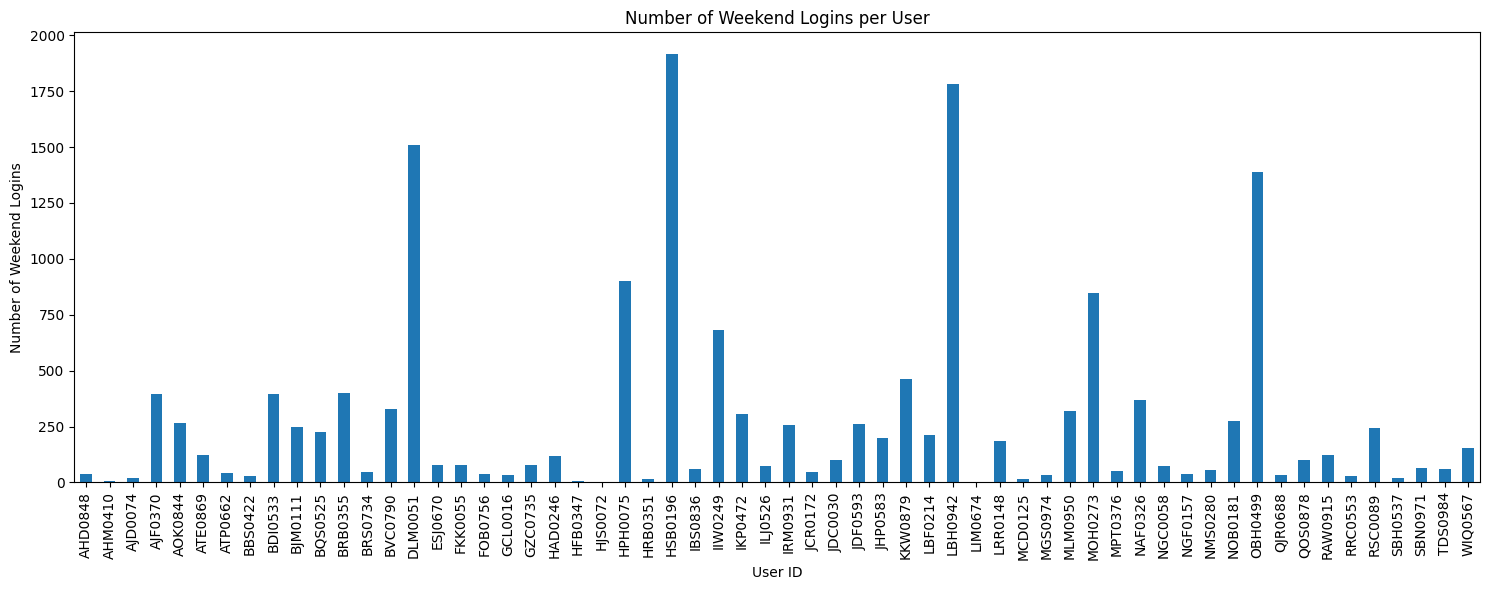

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
weekend_login_counts.plot(kind='bar')
plt.title('Number of Weekend Logins per User')
plt.xlabel('User ID')
plt.ylabel('Number of Weekend Logins')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Data preparation

### Subtask:
Prepare the `df_device_filtered` dataframe for creating a heatmap visualization of the number of user logins at each hour in each day.


In [ ]:
# Group by 'day' and 'hour' and count logins
login_counts = df_device_filtered.groupby(['day', 'hour'])['user'].count().unstack()

# Fill missing values with 0
login_counts = login_counts.fillna(0).astype(int)

# Ensure all possible hour values (0-23) and day values (0-6) are present
for hour in range(24):
  if hour not in login_counts.columns:
    login_counts[hour] = 0

for day in range(7):
  if day not in login_counts.index:
    login_counts.loc[day] = 0

display(login_counts)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
0,98,92,123,86,120,138,130,1326,5391,7427,...,7861,7837,5644,3206,1433,684,470,235,151,175
1,110,106,121,114,122,112,109,1380,5534,7616,...,8131,8269,5860,3440,1426,589,542,234,195,172
2,107,123,128,106,103,117,143,1336,5851,7772,...,8156,8058,5791,3166,1341,670,425,236,215,191
3,82,109,116,121,110,134,130,1357,5515,7619,...,8023,7872,5636,3243,1313,676,419,237,176,175
4,103,108,93,96,106,115,112,1190,5267,7336,...,7558,7824,5712,3168,1297,645,437,243,222,163
5,2,4,4,6,0,4,5,243,753,939,...,1002,1062,759,329,99,13,1,6,6,5
6,0,2,2,2,2,0,4,301,679,888,...,990,986,694,319,68,18,5,3,8,10


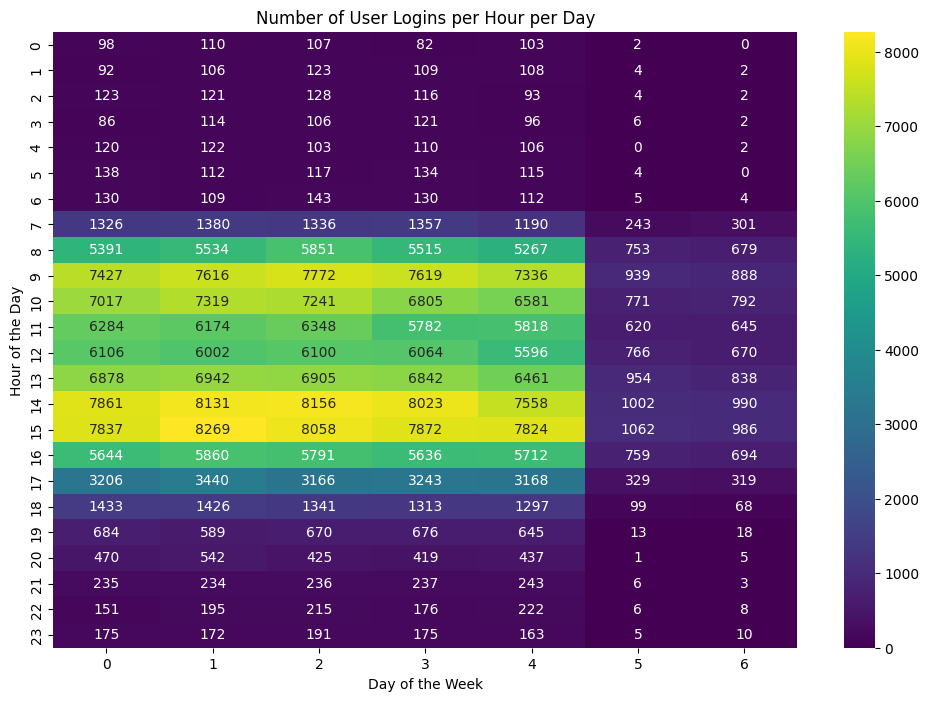

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(login_counts.T, annot=True, fmt="d", cmap="viridis")  # Transpose the data
plt.title("Number of User Logins per Hour per Day")
plt.xlabel("Day of the Week")
plt.ylabel("Hour of the Day")
plt.show()
